In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from src.data.columns.remove_columns import not_needed_columns
from src.Helpers.helper import NAPercent

# Create a sample DataFrame
df = pd.read_csv("./Quantitative_data.csv", low_memory=False)
columns = not_needed_columns
df = df.drop(columns, inplace=False, axis=1)
len(df.columns.tolist())
df = df[df.select_dtypes(include=['float', 'int', 'float64', 'int64']).columns]
len(df.columns.tolist())
df.columns[df.isnull().all()]

NA = NAPercent(df)
NA['NA Percent']
NA['NA Percent'] = NA['NA Percent'].astype(float)

NA.to_csv("NAPercent.csv")

df_columns = NA[NA['NA Percent'] < 50].index.tolist()

# We can use this for further analysis
df_great = df[df_columns]

df_great.to_csv("dataframe_good.csv")

df_great["cell_length_a"]


In [ ]:
import pandas as pd
from src.data.columns.remove_columns import not_needed_columns

# Create a sample DataFrame
df = pd.read_csv("./Quantitative_data.csv", low_memory=False)
columns = not_needed_columns
df = df.drop(columns, inplace=False, axis=1)

# Group the data based on a partial string match in the 'Product' column
grouped_data = df.groupby('Species')['Count'].sum()

# Display the grouped data
grouped_data.to_csv("group.csv")

In [ ]:
import pandas as pd

# Provided data
data = {
    'Species': [
        0.1, 0.5, 0.4, 0.9, 0.25, 0.25, 'NMR', 'NMR', 'NMR-AC', 'NMR-AC'
    ],
    'Value': [
        10, 20, 30, 40, 50, 60, 70, 80, 90, 100
    ]
}

# Create a DataFrame from the provided data
df = pd.DataFrame(data)

# Separate 'NMR' and 'NMR-AC' into different columns
df['Species_NMR'] = df['Species'].apply(lambda x: x if isinstance(x, str) and 'NMR' in x else None)
df['Species_NMR-AC'] = df['Species'].apply(lambda x: x if isinstance(x, str) and 'NMR-AC' in x else None)

# Convert 'Species' column to numeric values, ignoring non-numeric entries
df['Species'] = pd.to_numeric(df['Species'], errors='coerce')

# Define custom bins for range grouping
bins = [0, 0.3, 0.6, 1.0]

# Create a new column 'SpeciesRange' based on the range of 'Species' values
df['SpeciesRange'] = pd.cut(df['Species'], bins=bins)

# # Group by 'SpeciesRange' and sum the 'Value' for each range
# grouped_by_range = df.groupby('SpeciesRange')['Value'].sum()

# # Group by 'Species_NMR' and sum the 'Value' for each 'NMR' group
# grouped_by_NMR = df.groupby('Species_NMR')['Value'].sum()

# # Group by 'Species_NMR-AC' and sum the 'Value' for each 'NMR-AC' group
# grouped_by_NMR_AC = df.groupby('Species_NMR-AC')['Value'].sum()

# # Display the grouped data
# print("Grouped by Range:")
# print(grouped_by_range)
# print("\nGrouped by NMR:")
# print(grouped_by_NMR)
# print("\nGrouped by NMR-AC:")
# print(grouped_by_NMR_AC)

df


In [ ]:
import pandas as pd
import numpy as np

# Provided data
data = {
    'Species': [
        0.1, 0.5, 0.4, 0.9, 0.25, 0.25, 'NMR', 'NMR', 'NMR-AC', 'NMR-AC'
    ],
    'Value': [
        10, 20, 30, 40, 50, 60, 70, 80, 90, 100
    ]
}

# Create a DataFrame from the provided data
df = pd.DataFrame(data)

# Function to identify NMR or NMR-AC
def get_nmr_type(species):
    if 'NMR' in str(species):
        return 'NMR'
    return species

# Apply the function to create a new column 'NMR_Type'
df['NMR_Type'] = df['Species'].apply(get_nmr_type)

# Convert numeric entries to numeric values
df['NMR_Type'] = pd.to_numeric(df['NMR_Type'], errors='coerce')

# Define custom bins for range grouping
bins = [0, 0.3, 0.6, 1.0, np.inf]
labels = ['0-0.3', '0.3-0.6', '0.6-1.0', 'NMR/NMR-AC']

# Create a new column 'SpeciesRange' based on the range of 'NMR_Type' values
df['SpeciesRange'] = pd.cut(df['NMR_Type'], bins=bins, labels=labels, right=False)

# Group by 'SpeciesRange' and sum the 'Value' for each range
grouped_data = df.groupby('SpeciesRange')['Value'].sum()

# Display the grouped data
print(grouped_data)


In [ ]:
import pandas as pd
import numpy as np
import html
from src.data.columns.remove_columns import not_needed_columns
from src.Helpers.helper import generate_range_bins, generate_list_with_difference, convert_to_numeric_or_str

# Provided data
df = pd.read_csv("./Quantitative_data.csv", low_memory=False)
columns = not_needed_columns
df = df.drop(columns, inplace=False, axis=1)
# Apply the custom function to 'Column1'
df['Resolution'] = df['Resolution'].apply(convert_to_numeric_or_str)
# Separate 'NMR' and 'NMR-AC' from the 'Species' column
mask_str = df['Resolution'].apply(lambda x: isinstance(x, str))
df_numeric = df[~mask_str]
df_nmr = df[mask_str]

# Convert 'Species' column to numeric values in the numeric DataFrame
df_numeric['Resolution'] = pd.to_numeric(df_numeric['Resolution'], errors='coerce')

# Example usage:
range_resolution_meters = 0.9 # Range resolution of 10 meters
max_range_meters = round(df_numeric['Resolution'].max())     # Maximum range of 1000 meters

print(max_range_meters)

range_bins = generate_range_bins(range_resolution_meters, max_range_meters)

print(len(range_bins))

generated_list = generate_list_with_difference(len(range_bins), range_resolution_meters)
print(len(generated_list))


# Define custom bins for range grouping in the numeric DataFrame
bins = generated_list
labels = range_bins

# Create a new column 'SpeciesRange' based on the range of 'Species' values in the numeric DataFrame
df_numeric['SpeciesRange'] = pd.cut(df_numeric['Resolution'], bins=bins, labels=labels[:-1], right=False)

# Group by 'SpeciesRange' in the numeric DataFrame and sum the 'Value' for each range
grouped_numeric_data = df_numeric.groupby('SpeciesRange').size().reset_index()

# Group by 'Species' in the NMR DataFrame and sum the 'Value' for each species
grouped_nmr_data = df_nmr.groupby('Resolution').size().reset_index()

# Display the grouped data
# print("Numeric Data - Grouped by Range:")
# print(grouped_numeric_data)
# print("\nNMR Data - Grouped by Species:")
# print(grouped_nmr_data)

# Concatenate the dataframes vertically
merged_df = pd.concat([grouped_numeric_data, grouped_nmr_data], ignore_index=True)

# Convert 'Column1' to object data type
merged_df['SpeciesRange'] = merged_df['SpeciesRange'].astype('object')
merged_df['Resolution'] = merged_df['Resolution'].astype('object')

# Update 'Column1' with 'Column2' values where 'Column1' is NaN
merged_df['SpeciesRange'].fillna(merged_df['Resolution'], inplace=True)

# Drop the 'extra if exist' column
merged_df.drop('Resolution', axis=1, inplace=True)

merged_df


In [ ]:
import pandas as pd
import numpy as np
from src.data.columns.remove_columns import not_needed_columns
from src.Helpers.helper import generate_range_bins, generate_list_with_difference, convert_to_numeric_or_str

# Provided data
df = pd.read_csv("./Quantitative_data.csv", low_memory=False)
columns = not_needed_columns
df = df.drop(columns, inplace=False, axis=1)

max_range_meters=40
# Apply the custom function to 'Column1'
df['Resolution'] = df['Resolution'].apply(convert_to_numeric_or_str)
# Example usage:
range_resolution_meters = 0.3 # Range resolution of 10 meters

range_bins = generate_range_bins(range_resolution_meters, max_range_meters)

print(range_bins)

generated_list = generate_list_with_difference(len(range_bins), range_resolution_meters)
print(generated_list)


In [ ]:
d = [2,3,4,5,2,1,8,5,8,4]
d[:-3]

In [ ]:
import pandas as pd
import altair as alt

# Sample data
data = {
    'Category': ['Category A', 'Category C', 'Category B', 'Category D'],
    'Value': [10, 5, 8, 12]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Define the desired order of categories
desired_order = ['Category A', 'Category B', 'Category C', 'Category D']

# Create the bar chart using Altair
chart = alt.Chart(df).mark_bar().encode(
    x=alt.X('Category:N'),
    y=alt.X('Value:Q', sort=desired_order),
)

# Show the chart
chart.show()


In [ ]:
import pandas as pd
import re

# Sample DataFrame with HTML tags in columns
df = pd.read_csv("../PDB_PROJECT/Executables/enriched_db.csv", low_memory=False)

# Function to remove all HTML tags from a string
def remove_html_tags(text):
    try:
        if not text is None and pd.notna(text):
            clean_text = re.sub(r'<.*?>', '', text)
            # Replace '\r' and '\n' with a space
            clean_text = clean_text.replace('\r', ' ').replace('\n', ' ')
            return clean_text
        else:
            return ''
    
    except (Exception, TypeError) as e:
        print(text)
        print(str(e))

# Filter out columns with string data type
filtered_df = df.select_dtypes(include='object')

filtered_df = filtered_df.applymap(remove_html_tags)

filtered_df


In [ ]:
filtered_df['Resolution'].describe

In [1]:
import pandas as pd
import re
from src.implementation.visualization import DataImport

# Sample DataFrame with HTML tags in columns
# df = pd.read_csv("./dist/data_folder/enriched_db.csv", low_memory=False)
data_import = DataImport()
dataset = data_import.loadFile()

ModuleNotFoundError: No module named 'flask_restful'

In [15]:
import pandas as pd

df = pd.read_csv("./public/data_sessions/Ebenezer_Awotoro_001/dataset.csv")
df.iloc[:, -1].name
# df


'Resolution'

Explained Variance Ratio: [0.72962445 0.22850762]
Explained Variance: [2.93808505 0.9201649 ]
Explained Components: [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
Explained Features: 4


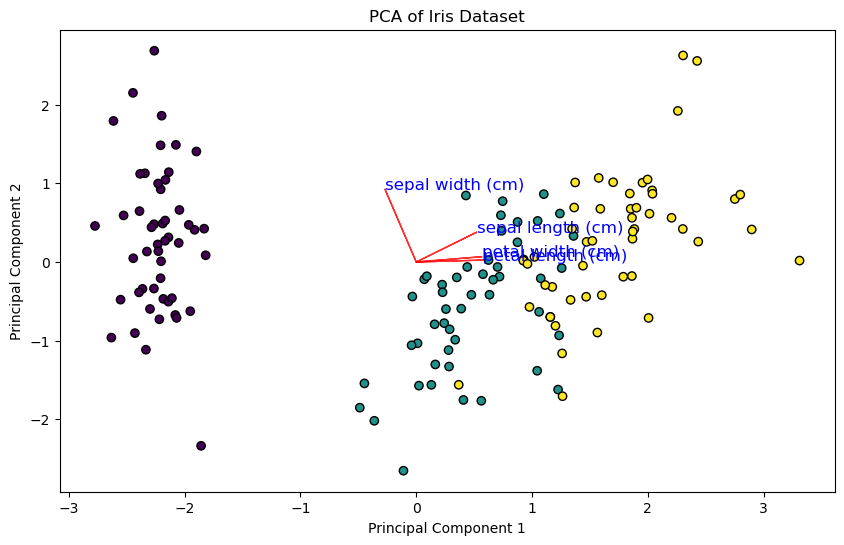

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Get principal components (loadings)
loadings = pca.components_.T

# Create a DataFrame for loadings
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=iris.feature_names)

# Visualize PCA with loadings and explained variance
plt.figure(figsize=(10, 6))

# Scatter plot of PCA points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')

# Annotate loadings on the plot
for feature in loadings_df.index:
    plt.arrow(0, 0, loadings_df['PC1'][feature], loadings_df['PC2'][feature],
              color='r', alpha=0.8)
    plt.text(loadings_df['PC1'][feature], loadings_df['PC2'][feature], feature,
             color='b', fontsize=12)

# Print explained variance
print("Explained Variance Ratio:", explained_variance_ratio)
print("Explained Variance:", pca.explained_variance_)
print("Explained Components:", pca.components_)
print("Explained Features:", pca.n_features_)

plt.show()


In [8]:
from sklearn import datasets
wine_data = datasets.load_wine(as_frame=True)
df = wine_data.data
print(df.shape)

(178, 13)


In [9]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(df)

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit_transform(scaled_df)

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [11]:
print(pca.components_)

[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]
 [-0.20738262  0.08901289  0.6262239   0.61208035  0.13075693  0.14617896
   0.1506819   0.17036816  0.14945431 -0.13730621  0.08522192  0.16600459
  -0.12674592]]


In [12]:
print(sum(pca.explained_variance_ratio_))

0.6652996889318523


In [13]:
import numpy as np
nums = np.arange(14)

In [14]:
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(scaled_df)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

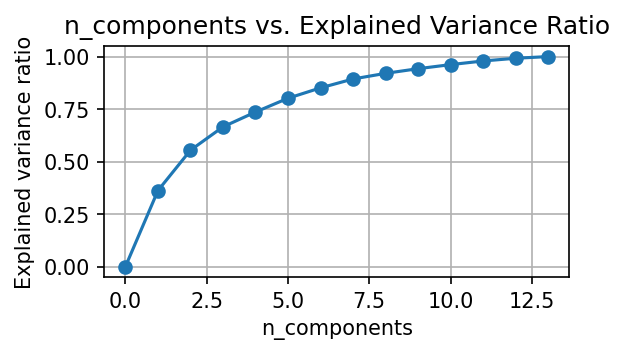

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

In [21]:
def PCAComponentsOption(n_features = 2):
    data = [i for i in range(1, n_features+1)]
    data = transform_data_view(data, 'PCA_n_feature_option', 'single')

    return data


def transform_data_view(data, unique_field_name, multiple_selection):
    data_object = {
        "options": [{"value": value, "name": value} for value in data],
        "model_name": [],
        "safe_name" : "name",
        "field_name": unique_field_name,
        "multiple": True if multiple_selection == "multiple" else False,
        "tooltip": "",
    }

    return data_object

In [27]:
start = 0.0
end = 0.5
step = 0.1

float_list = [str(round(start + i * step, 1)) for i in range(int((end - start) / step) + 1)]
print(float_list)

['0.0', '0.1', '0.2', '0.3', '0.4', '0.5']


In [30]:
str("2")

'2'

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


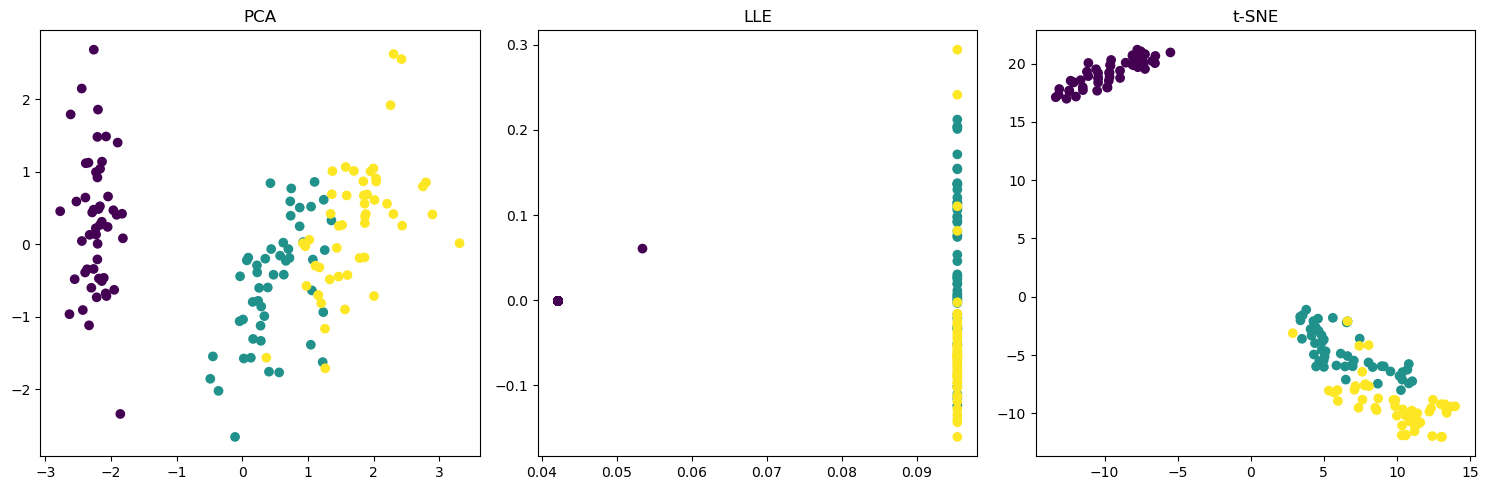

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding, TSNE

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply Locally Linear Embedding (LLE)
lle = LocallyLinearEmbedding(n_components=2)
X_lle = lle.fit_transform(X_scaled)

# Apply t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot PCA results
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y)
axes[0].set_title('PCA')

# Plot LLE results
axes[1].scatter(X_lle[:, 0], X_lle[:, 1], c=y)
axes[1].set_title('LLE')

# Plot t-SNE results
axes[2].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
axes[2].set_title('t-SNE')

plt.tight_layout()
plt.show()


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the iris dataset
data = load_iris()
X = data.data
feature_names = data.feature_names

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Get the principal components
principal_components = pca.components_

# Plot the composition of the first principal component
plt.figure(figsize=(8, 5))
plt.bar(feature_names, principal_components[2], color='b')
plt.title('Composition of First Principal Component')
plt.xlabel('Features')
plt.ylabel('Loadings')
plt.xticks(rotation=45)
plt.show()


IndexError: index 2 is out of bounds for axis 0 with size 2

<Figure size 800x500 with 0 Axes>

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


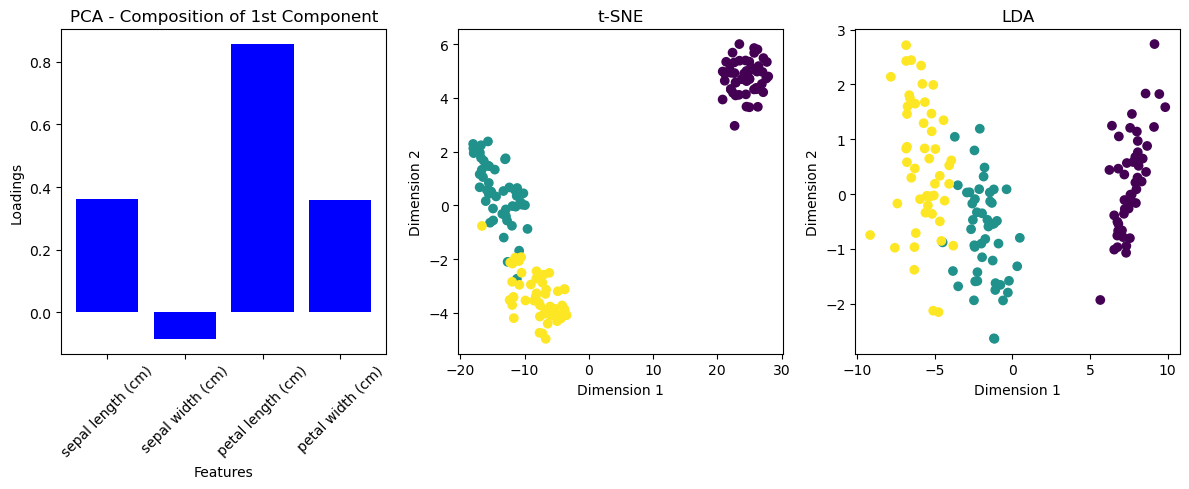

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the iris dataset
data = load_iris()
X = data.data
feature_names = data.feature_names

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, data.target)

# Get the principal components for PCA
pca_components = pca.components_

# Plot the composition of first principal component in PCA
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.bar(feature_names, pca_components[0], color='b')
plt.title('PCA - Composition of 1st Component')
plt.xlabel('Features')
plt.ylabel('Loadings')
plt.xticks(rotation=45)

# Plot the transformed data in t-SNE
plt.subplot(1, 3, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data.target)
plt.title('t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# Plot the transformed data in LDA
plt.subplot(1, 3, 3)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=data.target)
plt.title('LDA')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

plt.tight_layout()
plt.show()


In [38]:
import numpy as np
import pandas as pd
import altair as alt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, TruncatedSVD, NMF, FactorAnalysis

# Load the iris dataset
data = load_iris()
X = data.data
feature_names = data.feature_names

# Create a DataFrame with feature names
df = pd.DataFrame(X, columns=feature_names)

# Perform dimensionality reduction techniques
methods = [PCA(n_components=2), TruncatedSVD(n_components=2), NMF(n_components=2), FactorAnalysis(n_components=2)]
method_names = ['PCA', 'TruncatedSVD', 'NMF', 'FactorAnalysis']

results = []
for method, method_name in zip(methods, method_names):
    X_transformed = method.fit_transform(X)
    results.append(pd.DataFrame(X_transformed, columns=['Dimension 1', 'Dimension 2']))

# Concatenate the results
df_results = pd.concat([df] + results, axis=1)

# Melt the DataFrame for visualization
melted_df = df_results.melt(id_vars=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], 
                            var_name='Method', value_name='Component')

# Create Altair chart
chart = alt.Chart(melted_df).mark_circle().encode(
    x='sepal length (cm)',
    y='sepal width (cm)',
    color='Method',
    size=alt.value(100),
    tooltip=['Method', 'Component']
).properties(
    width=400,
    height=400
)

chart.show()


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


RuntimeError: Internal: _stream is not defined.

In [41]:
import altair as alt
import pandas as pd

# Sample data
data = pd.DataFrame({
    'Category': ['A', 'B', 'C'],
    'Value1': [10, 20, 15],
    'Value2': [25, 15, 30]
})

# Create a bar chart for Value1
chart1 = alt.Chart(data).mark_bar().encode(
    x='Category',
    y='Value1'
).properties(
    title='Bar Chart for Value1'
)

# Create a bar chart for Value2
chart2 = alt.Chart(data).mark_bar().encode(
    x='Category',
    y='Value2'
).properties(
    title='Bar Chart for Value2'
)

# Combine the charts horizontally
combined_chart = alt.hconcat(chart1, chart2)

combined_chart.show()


RuntimeError: Internal: _stream is not defined.

In [42]:
data

,Category,Value1,Value2
0,A,10,25
1,B,20,15
2,C,15,30


In [43]:
import pandas as pd
import numpy as np

# Given array
data_array = np.array([[ 0.10714511, -0.05861377, -0.02617425, -0.04421264, 0.12257909, -0.98357454],
                       [ 0.66674943, -0.02202573,  0.73556964, -0.03693171, 0.08954824,  0.06719019],
                       [-0.59158926, -0.16193153,  0.45620366,  0.07301649, 0.64051138,  0.00960759]])

# Convert the array to a Pandas DataFrame
df = pd.DataFrame(data_array, columns=['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6'])

# Display the DataFrame
print(df)

       Col1      Col2      Col3      Col4      Col5      Col6
0  0.107145 -0.058614 -0.026174 -0.044213  0.122579 -0.983575
1  0.666749 -0.022026  0.735570 -0.036932  0.089548  0.067190
2 -0.591589 -0.161932  0.456204  0.073016  0.640511  0.009608


In [52]:
myDf = df.T
myDf.columns = ["P1", "P2", "P3"]

In [53]:
myDf

,P1,P2,P3
Col1,0.107145,0.666749,-0.591589
Col2,-0.058614,-0.022026,-0.161932
Col3,-0.026174,0.735570,0.456204
Col4,-0.044213,-0.036932,0.073016
Col5,0.122579,0.089548,0.640511
Col6,-0.983575,0.067190,0.009608


In [67]:
import pandas as pd
import numpy as np
import html

not_needed_columns = [
    'Unnamed: 0', 'Unnamed: 0_x', 
    'Unnamed: 0.1', 'Unnamed: 0_y', 'Unnamed: 0_1',
    'Secondary Bibliogrpahies', 'Related Pdb Entries', 'rcsb_primary_citation_pdbx_database_id_pub_med', 
    'citation_pdbx_database_id_pub_med', 'rcsb_entry_container_identifiers_pubmed_id'
]

df = pd.read_csv("./Quantitative_data.csv", low_memory=False)
df = df.drop(not_needed_columns, inplace=False, axis=1)
columns = df.select_dtypes(include=['int', 'float'])
print(columns.describe)
columns.to_csv("columns.csv")


<bound method NDFrame.describe of       cell_angle_alpha  cell_angle_beta  cell_angle_gamma  cell_length_a  \
0                 90.0             90.0              90.0          99.40   
1                 90.0             90.0              90.0          99.57   
2                 90.0             90.0              90.0          99.40   
3                 90.0             90.0              90.0          98.65   
4                 90.0             90.0              90.0          98.87   
...                ...              ...               ...            ...   
3130               NaN              NaN               NaN            NaN   
3131               NaN              NaN               NaN            NaN   
3132               NaN              NaN               NaN            NaN   
3133               NaN              NaN               NaN            NaN   
3134               NaN              NaN               NaN            NaN   

      cell_length_b  cell_length_c  cell_zpdb  \
0   

In [69]:
df = pd.read_csv("./X_train.csv", low_memory=False)
# Filter rows with no empty values
non_empty_rows = df[~df.isnull().any(axis=1)]
non_empty_rows

,Unnamed: 0,refine_ls_rfactor_rwork,refine_ls_rfactor_rfree_error,refine_ls_rfactor_rfree,refine_ls_wrfactor_rwork,refine_ls_wrfactor_rfree,refine_occupancy_max,refine_occupancy_min


In [92]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer, KNNImputer
from fancyimpute import SoftImpute
from impyute.imputation.cs import mice
# from missingpy import MissForest
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# from keras.layers import Input, Dense
# from keras.models import Model

# Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)

# Introduce missing values
import numpy as np
np.random.seed(0)
mask = np.random.choice([False, True], size=X.shape, p=[0.2, 0.8])
X_with_missing = X.copy()
X_with_missing[mask] = np.nan

# Method 1: SimpleImputer (Mean)
imputer_mean = SimpleImputer(strategy='mean')
X_imputed_mean = imputer_mean.fit_transform(X_with_missing)

# Method 2: KNNImputer
imputer_knn = KNNImputer(n_neighbors=3)
X_imputed_knn = imputer_knn.fit_transform(X_with_missing)

# imputer = SoftImpute()
# data_imputed = imputer.fit_transform(X_with_missing)

# data_imputed = mice(X_with_missing)

# imputer = MissForest()
# data_imputed = imputer.fit_transform(X_with_missing)


# imputer = IterativeImputer(max_iter=10, random_state=0)  # Adjust max_iter as needed
# data_imputed = imputer.fit_transform(X_with_missing)

# # Method 3: NMF
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_with_missing)
# imputer_nmf = NMF(n_components=2)  # Choose the number of components
# X_imputed_nmf = imputer_nmf.fit_transform(X_scaled)
# X_imputed_nmf = scaler.inverse_transform(X_imputed_nmf)

# Method 4: Autoencoder
# input_layer = Input(shape=(X.shape[1],))
# encoded = Dense(2, activation='relu')(input_layer)
# decoded = Dense(X.shape[1], activation='linear')(encoded)
# autoencoder = Model(input_layer, decoded)
# autoencoder.compile(optimizer='adam', loss='mean_squared_error')
# autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32)
# X_imputed_autoencoder = autoencoder.predict(X_scaled)
# X_imputed_autoencoder = scaler.inverse_transform(X_imputed_autoencoder)

# Print the first few rows of each imputed dataset
print("Imputed with Mean:")
pd.DataFrame(X_imputed_mean).to_csv("testKNNMean.csv")
print(X_imputed_mean[:5])
print("\nImputed with KNN:")
pd.DataFrame(X_imputed_knn).to_csv("testKNN.csv")
print(X_imputed_knn[:5])
# print("\nImputed with NMF:")
# print(X_imputed_nmf[:5])
# print("\nImputed with Autoencoder:")
# print(X_imputed_autoencoder[:5])


Imputed with Mean:
[[5.97241379 3.06538462 3.51923077 1.11578947]
 [5.97241379 3.06538462 3.51923077 1.11578947]
 [5.97241379 3.06538462 3.51923077 1.11578947]
 [5.97241379 3.06538462 1.5        0.2       ]
 [5.         3.06538462 3.51923077 1.11578947]]

Imputed with KNN:
[[5.97241379 3.06538462 3.51923077 1.11578947]
 [5.97241379 3.06538462 3.51923077 1.11578947]
 [5.97241379 3.06538462 3.51923077 1.11578947]
 [5.23333333 3.46666667 1.5        0.2       ]
 [5.         3.6        2.76666667 0.43333333]]


In [87]:
pip install missingpy

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 49.1/49.1 kB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [79]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
